In [2]:
# Importing major libraries for data analysis.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from geopy.geocoders import Nominatim

# Reading the Dataset.
data = pd.read_csv("Airbnb_Open_Data.csv", low_memory = False)
data.head(4)

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07-05-2019,4.64,4.0,1.0,322.0,NaN,NaN


In [3]:
# Checking all-columns name.
data.columns

Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [4]:
# Checking null/blanks values in Dataset.
data.isnull().sum()

id                                     0
name                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [5]:
# Changing datatype of 'last review' column 'obect' to 'dattime'.
data['last review']= pd.to_datetime(data['last review'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

## _DATA CLEANING & TRANSFORMATION_ >>> ##

In [6]:
# Checking Dataset's info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [7]:
# Removing missing values.
data.dropna(subset =['name','host name'], inplace = True)
data.isnull().sum()

id                                     0
name                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                        49879
reviews per month                  15763
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [8]:
# Deleting unnecessary columns from dataset.
data = data.drop(columns = ['house_rules','license'], errors = 'ignore')
data.columns

Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [9]:
# Removing $ sign from 'price','service fee' column and change their data type.
data['price'] = data['price'].replace('[\$,]','', regex = True).astype(float)
data['service fee'] = data['service fee'].replace('[\$,]','', regex = True).astype(float)
data.info()

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\shubh\AppData\Local\Temp\ipykernel_8492\3286753483.py:2: SyntaxWarning: invalid escape sequence '\$'
  data['price'] = data['price'].replace('[\$,]','', regex = True).astype(float)
C:\Users\shubh\AppData\Local\Temp\ipykernel_8492\3286753483.py:3: SyntaxWarning: invalid escape sequence '\$'
  data['service fee'] = data['service fee'].replace('[\$,]','', regex = True).astype(float)


<class 'pandas.core.frame.DataFrame'>
Index: 101949 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101949 non-null  int64         
 1   name                            101949 non-null  object        
 2   host id                         101949 non-null  int64         
 3   host_identity_verified          101673 non-null  object        
 4   host name                       101949 non-null  object        
 5   neighbourhood group             101923 non-null  object        
 6   neighbourhood                   101933 non-null  object        
 7   lat                             101941 non-null  float64       
 8   long                            101941 non-null  float64       
 9   country                         101423 non-null  object        
 10  country code                    101827 non-null  object      

In [10]:
# Removing duplicate values form dataset.
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   name                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [11]:
# Adding new column total price in dataset.
data['total price'] = data['price'] + data['service fee']
data.head(2)

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,total price
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,1159.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,170.0


In [12]:
# Filled null/blanks values of 'service fee' column with 'mean' value of their own column.
mean = data['service fee'].mean()
data['service fee'] = data['service fee'].fillna(mean)
data.head()

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,total price
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,1159.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,170.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,744.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,245.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,692.0


In [13]:
# Filling null/blanks value of 'neighbourhood' column with latitude, longitude data by geopy library.

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geoapi")

# Function to fetch neighbourhood
def fetch_neighbourhood(row):
    if pd.isnull(row['neighbourhood']) and pd.notnull(row['lat']) and pd.notnull(row['long']):
        try:
            location = geolocator.reverse((row['lat'], row['long']), exactly_one=True)
            return location.raw.get('address', {}).get('neighbourhood', None)
        except Exception as e:
            print(f"Error: {e}")
    return row['neighbourhood']

# Apply the function to fill null values
data['neighbourhood'] = data.apply(fetch_neighbourhood, axis=1)

# Display the updated DataFrame
data.head(3)
# null_row = data[data['neighbourhood'].isnull()]
# null_row

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,total price
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,1159.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,170.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,744.0


In [14]:
# Filling null/blank values of 'host_identity_verified' column with 'Not Available'.

data.fillna({'host_identity_verified': 'Not Available'}, inplace = True)
data['host_identity_verified'].isna().sum()

0

In [15]:
# Filling null/blank values of 'neighbourhood group' column with 'Mode value of that column'.

data.fillna({'neighbourhood group': data['neighbourhood group'].mode()[0]}, inplace = True)
data['neighbourhood group'].isnull().sum()

0

In [16]:
# Replace neughbourhood group column values.

data['neighbourhood group'] = data['neighbourhood group'].str.replace('brookln', 'Brooklyn').str.replace('manhatan','Manhattan')
v = (data['neighbourhood'] == 'manhatan').sum()
v

0

In [17]:
# Filling null/blank values of 'lat', 'long' column by help with 'neighbouhood' column through geopy library.

geolocator  = Nominatim(user_agent = 'UniqueUserAgent')
for index, row in data.iterrows():
    if pd.isna(row['lat']) or pd.isna(row['long']):
        location  = geolocator.geocode(row['neighbourhood'] + ", New York City")
        if location:
            data.at[index, 'lat'] = location.latitude
            data.at[index, 'long'] = location.latitude

data.head(5)

,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,total price
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,1159.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,170.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Not Available,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,744.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,245.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0,692.0


In [18]:
# Filling null/blank values of 'country' column with 'United States' and 'country code' with 'US'.

data.fillna({'country':'United States', 'country code': 'US' }, inplace = True)
data[['country','country code']].isna().sum()

country         0
country code    0
dtype: int64

In [19]:
# Filling null/blank values of 'instant_bookable' column with 'Unknnown'.

data.fillna({'instant_bookable':'Unknown'}, inplace = True)
data['instant_bookable'].isna().sum()

0

In [20]:
# Filling null/blank value of 'cancellation_policy' column with the mode value of their own column.
pd.set_option('display.max_columns',None)
data['cancellation_policy'] = data['cancellation_policy'].replace('ibmean' , 'Unspecified')
data['cancellation_policy'].value_counts()

cancellation_policy
moderate    33946
strict      33709
flexible    33685
Name: count, dtype: int64

In [21]:
# Filling null/blank values of 'Construction year' column with 'Not Define'.

data.fillna({'Construction year':'Not Specified'}, inplace = True)
data['Construction year'].isna().sum()

0

In [22]:
# Handling missing values with yours specific in dataset.
data.fillna({'reviews per month': 0, 'last review' : data['last review'].min()}, inplace = True)
data[['reviews per month','last review']].isnull().sum()

reviews per month    0
last review          0
dtype: int64

In [23]:
# Filling null/blank values of 'price' column with their min value.

data.fillna({'price': data['price'].min()}, inplace = True)
data['price'].isna().sum()

0

In [24]:
# Replace values greater than 365 with 365 and negative values with 1.
# Filling null/blank values of 'minimum nights' with 1.

data['minimum nights'].apply(lambda x: 1 if x < 0 else min(x, 365))
data.fillna({'minimum nights': 1}, inplace = True)
data['minimum nights'].isna().sum()

0

In [25]:
# Filling null/blank values of 'number of reviews' column with with 0.

data.fillna({'number of reviews' : 0}, inplace = True)
data['number of reviews'].isna().sum()

0

In [26]:
# Filling null/blank values of 'review rate number' column with mode value of their own column.

data.fillna({'review rate number' : data['review rate number'].mode()[0]}, inplace = True)
data['review rate number'].isna().sum()

0

In [27]:
# Filling null/blank values of 'calculated host listings count' column with 'Unknown'.

data.fillna({'calculated host listings count' : 'Unknown'}, inplace = True)
data['calculated host listings count'].isna().sum()

0

In [28]:
# Replace values greater than 365 with 365 and negative values with 1.
# Filling null/blank values of column 'availability 365' with 1.

data['availability 365'].apply(lambda x: 365 if x > 365 else x)
data.fillna({'availability 365': 1}, inplace = True)
data['availability 365'].isna().sum()

0

In [29]:
# Filling null/blanks of 'total price' column with total of 'price','service fee' column value.

nan = data['price'] + data['service fee']
data.fillna({'total price' : nan}, inplace = True)
data['total price'].isnull().sum()

0

In [61]:
# Checking entire dataset for null values.
data.isnull().sum()

id                                    0
name                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         2
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                  70
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                           0
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
total price                           0


## **_DataFrame Statistics_ :-** ##

In [31]:
data.describe()

,id,host id,lat,long,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,availability 365,total price
count,1.014100e+05,1.014100e+05,101410.000000,101410.000000,101410.000000,101410.000000,101410.000000,101410.000000,101410,101410.000000,101410.000000,101410.000000,101410.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.940616,624.024968,125.043998,8.086106,27.462479,2016-02-20 18:00:47.285277440,1.163207,3.283769,140.584153,749.068965
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,50.000000,10.000000,-1223.000000,0.000000,2012-08-25 00:00:00,0.000000,1.000000,-10.000000,60.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982560,338.000000,68.000000,1.000000,1.000000,2012-08-25 00:00:00,0.090000,2.000000,3.000000,406.000000
50%,2.922911e+07,4.912069e+10,40.722305,-73.954440,623.000000,125.000000,3.000000,7.000000,2015-12-14 00:00:00,0.480000,3.000000,95.000000,748.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,912.000000,182.000000,5.000000,30.000000,2019-06-17 00:00:00,1.710000,4.000000,268.000000,1094.000000
max,5.736742e+07,9.876313e+10,40.916970,40.787045,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,3677.000000,1440.000000
std,1.626820e+07,2.853703e+10,0.055848,1.019739,332.391107,66.225691,30.322173,49.518468,NaN,1.683708,1.286901,135.437952,398.318571


In [32]:
# Converting our final clean dataset to CSV format.

data.to_csv('Airbnb_Data.csv', index=False)

# **_↪ Exploratory Data Analysis (EDA) →_** #
## **_VISUALIZATIONS_ :** ##

## **1. Room Rent Price Distribution ->** ##

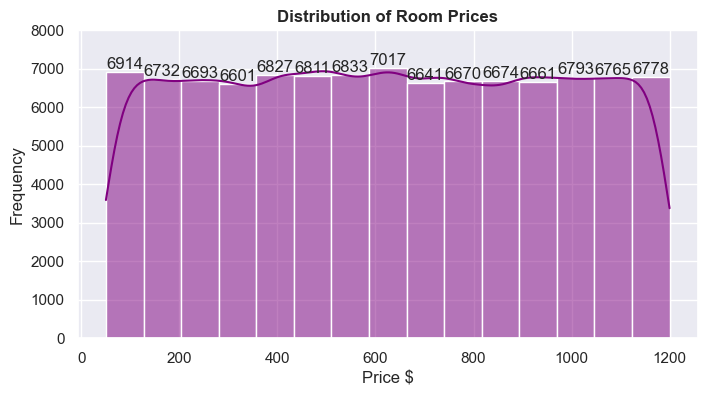

In [78]:
# Histogram using seaborn
#plt.style.use('dark_background')

plt.figure(figsize = (8, 4))
sns.set_style('darkgrid')

count = [7000]
ax = sns.histplot(data=data,
                  x='price', 
                  bins=15, 
                  kde=True, 
                  edgecolor = 'white',
                  color = 'purple') # kde=True adds a kernel density estimate line

ax.bar_label(ax.containers[0])

plt.ylim(0, max(count) + 1000)

plt.title('Distribution of Room Prices', fontweight = 'bold')
plt.xlabel('Price $')
plt.ylabel('Frequency')

plt.show()

## **2. Finding Room Type Distribution ->** ##

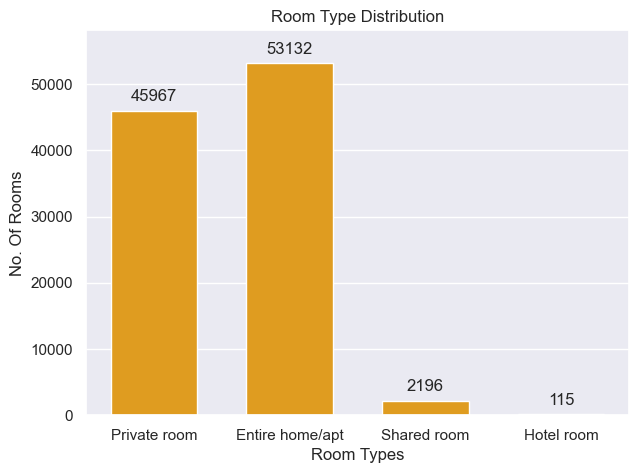

In [58]:
plt.figure(figsize = (7,5))
sns.set_style('darkgrid')

count = [53132]
bar = sns.countplot(data = data,
                    x = 'room type',
                    color ='orange', 
                    gap = 0.2)

bar.bar_label(bar.containers[0], label_type = 'edge', padding  = 5)
plt.ylim(0, max(count) + 5000)
        
plt.title('Room Type Distribution')
plt.xlabel('Room Types')
plt.ylabel('No. Of Rooms')
plt.show()

## **3. Listing Distribution across Neighbourhood Groups ->** ##

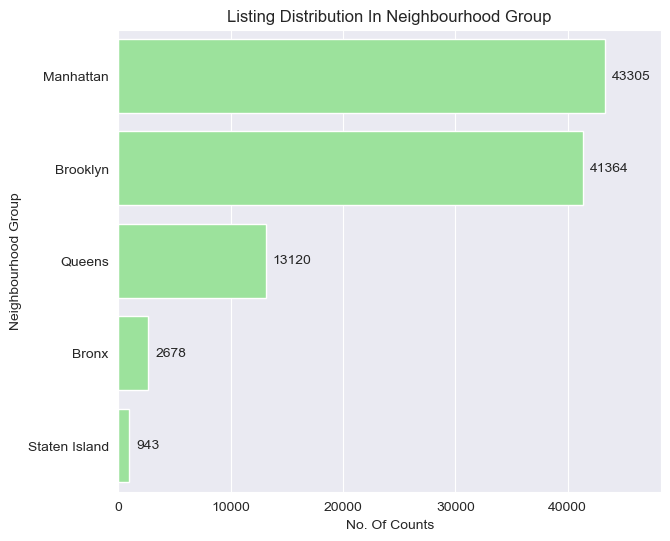

In [35]:
plt.figure(figsize = (7,6))                         # used for figure size adjustment.
sns.set_style('darkgrid')                           # used for setting the gridline.

count = [43304]                                     # count contains the value which column has the highest value, so xlim can increse the grid size equal to that value.
bar = sns.countplot(data = data,
                    y = 'neighbourhood group',
                    color = 'lightgreen',
                    order = data['neighbourhood group'].value_counts().index)

plt.bar_label(bar.containers[0], padding = 5)       # bar_label add bar value to each bar at the top(default) and paading for  adding space between column to value.
plt.xlim(0, max(count) + 5000)                      # xlim increase the size of x-axis gridline.

plt.title('Listing Distribution In Neighbourhood Group')
plt.xlabel('No. Of Counts')
plt.ylabel('Neighbourhood Group')
plt.show()

## **4. Relationship Between Price And Room Types ->** ##

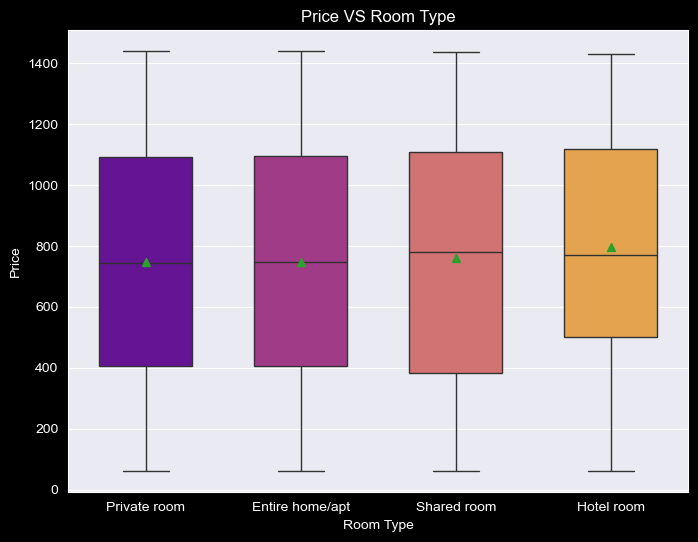

In [36]:
plt.figure(figsize = (8,6), facecolor = 'black')
sns.set_style('darkgrid')

sns.boxplot(data = data,
            x = 'room type',
            y = 'total price',
            hue = 'room type',
            palette = 'plasma',
            width = 0.6,
            showmeans = True)

plt.title('Price VS Room Type',color ='white')
plt.xlabel('Room Type',color ='white')
plt.ylabel('Price',color ='white')

plt.tick_params(axis='x', colors='white')  # Changing X-axis ticks color into 'white'
plt.tick_params(axis='y', colors='white')  # Changing Y-axis ticks color into 'white'.

plt.show()

## **5. Correlation Analysis ->** ## 

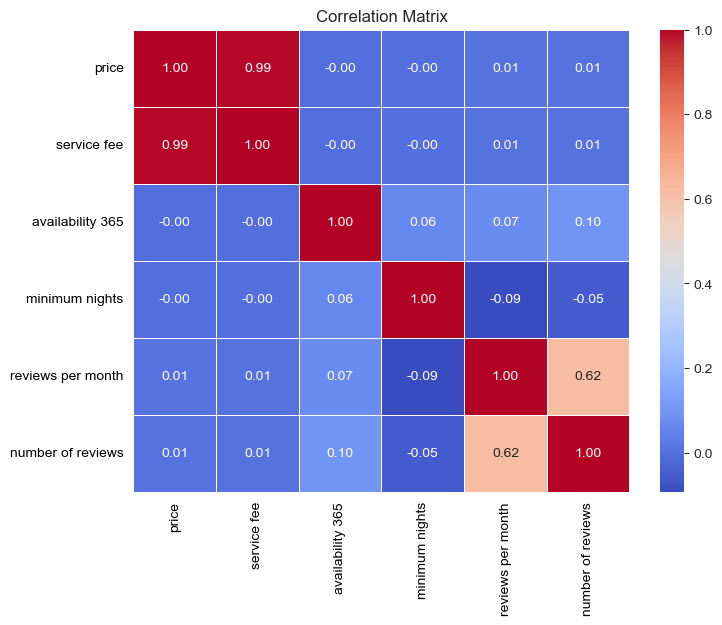

In [37]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

corr = ['price','service fee','availability 365', 'minimum nights','reviews per month', 'number of reviews']
cd = data[corr].corr()

sns.heatmap(data= cd,  
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)

plt.title('Correlation Matrix')
plt.tick_params(axis='x', colors='black')  # Changing X-axis ticks color into 'white'
plt.tick_params(axis='y', colors='black')  # Changing Y-axis ticks color into 'white'.

plt.show()

In [38]:
# Top Categories
# a) Most expensive neighborhoods (average price)

top_expensive_neighborhoods = data.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
top_expensive_neighborhoods

neighbourhood group
Queens           628.610442
Bronx            626.124347
Brooklyn         625.222391
Staten Island    621.490986
Manhattan        621.417319
Name: price, dtype: float64

In [39]:
# b) Top hosts by number of listings

top_hosts = data['host name'].value_counts().head(10)
top_hosts

host name
Michael         877
David           759
John            576
Alex            541
Sonder (NYC)    515
Daniel          468
Karen           436
Sarah           428
Maria           420
Anna            396
Name: count, dtype: int64

In [40]:
# c) Most reviewed listings

most_reviewed = data[['name', 'number of reviews']].sort_values(by='number of reviews', ascending=False).head(10)
most_reviewed

,name,number of reviews
52488,Sonder Battery Park | Studio Apartment,1024.0
62244,City King,1010.0
49799,Amazing Micro Unit W/ communal rooftop and kit...,966.0
53078,Enjoy great views of the City!,884.0
49653,Come catch a Broadway Show & stay in Times Square,849.0
49827,Hudson River View King Bed at Higher Floor,797.0
49605,Beautiful Standard Full Room at The Ridge,776.0
57532,King Room City,738.0
50780,THE PRIVACY DEN ~ 5 MINUTES TO JFK,698.0
54308,Entire New Apartment in Park Slope / Gowanus,679.0


# **_↪ Geospatial Analysis →_** #
## **_VISUALIZATIONS_ :** ##

## **1. Average Price by Neighbourhood Group ->** ##

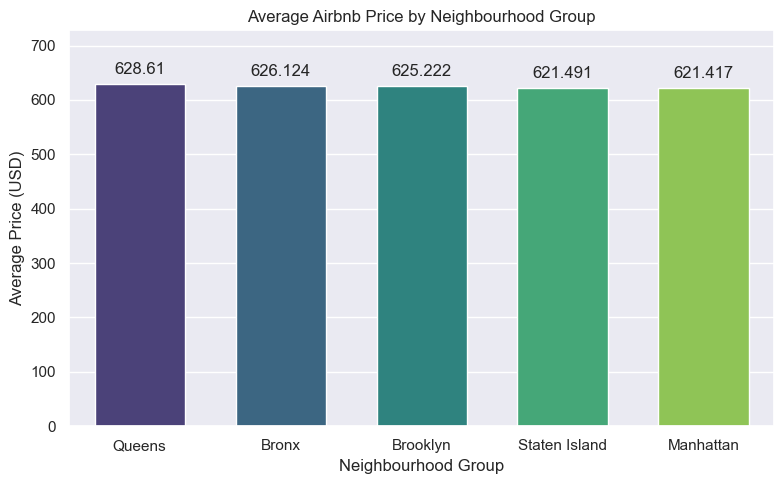

In [41]:
plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")

avg_price_by_group = data.groupby("neighbourhood group")["price"].mean().sort_values(ascending=False)
count = [628]

bar = sns.barplot(x=avg_price_by_group.index, 
                  y=avg_price_by_group.values,
                  hue = avg_price_by_group.index, 
                  palette="viridis",
                  gap = 0.2)

for container in bar.containers:
    bar.bar_label(container, padding = 5)

plt.ylim(0, max(count) + 100)

plt.title("Average Airbnb Price by Neighbourhood Group")
plt.ylabel("Average Price (USD)")
plt.xlabel("Neighbourhood Group")
plt.tight_layout()
plt.show()

## **2. Room Type Distribution By Naighbourhood Group ->** ####

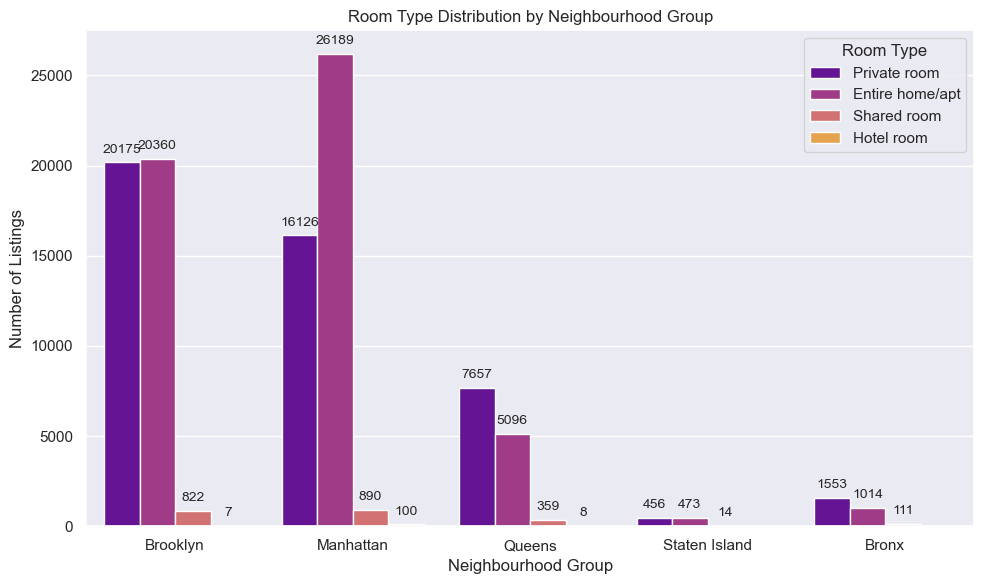

In [42]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

bar = sns.countplot(data=data, 
              x='neighbourhood group', 
              hue='room type',
              palette = 'plasma',dodge = True)

for container in bar.containers:
    bar.bar_label(container, padding = 5, size = 10)

plt.title("Room Type Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")

plt.legend(title='Room Type')
plt.tight_layout()

plt.show()

# **_↪ Revenue Analysis →_** #
## **_VISUALIZATIONS_ :** ##

## **1. Average Estimated Annual Revenue by Room Type ->** ##

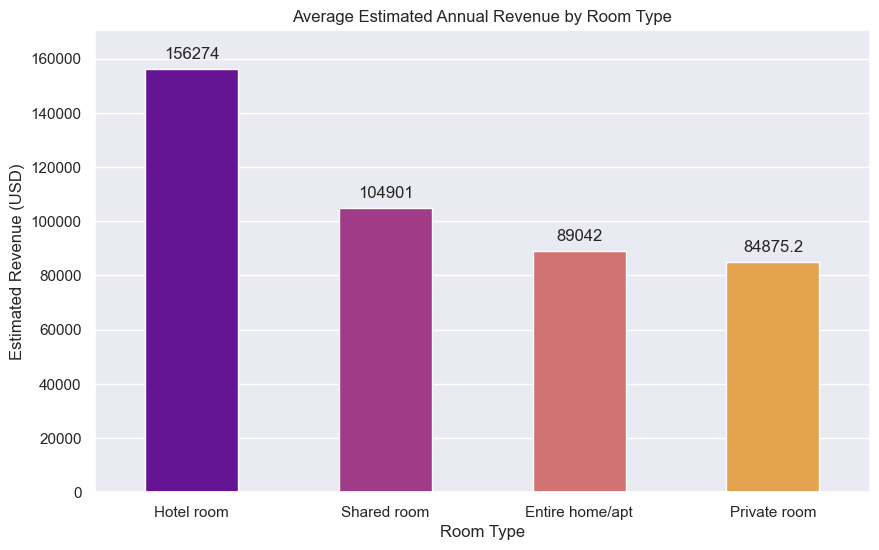

In [43]:
data['estimated_annual_revenue'] = data['price'] * data['availability 365']
avg_revenue_by_room_type = data.groupby('room type')['estimated_annual_revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')

count = [170000]

bar = sns.barplot(x=avg_revenue_by_room_type.index, 
            y=avg_revenue_by_room_type.values, 
            palette="plasma", 
            hue = avg_revenue_by_room_type.index,
            gap = 0.4)

for container in bar.containers:
    bar.bar_label(container, padding = 5)
    
plt.ylim(0, max(count) + 500)

plt.title("Average Estimated Annual Revenue by Room Type")
plt.ylabel("Estimated Revenue (USD)")
plt.xlabel("Room Type")

plt.show()

## **2. Average Service Fee By Neighbourhood Group ->** ##

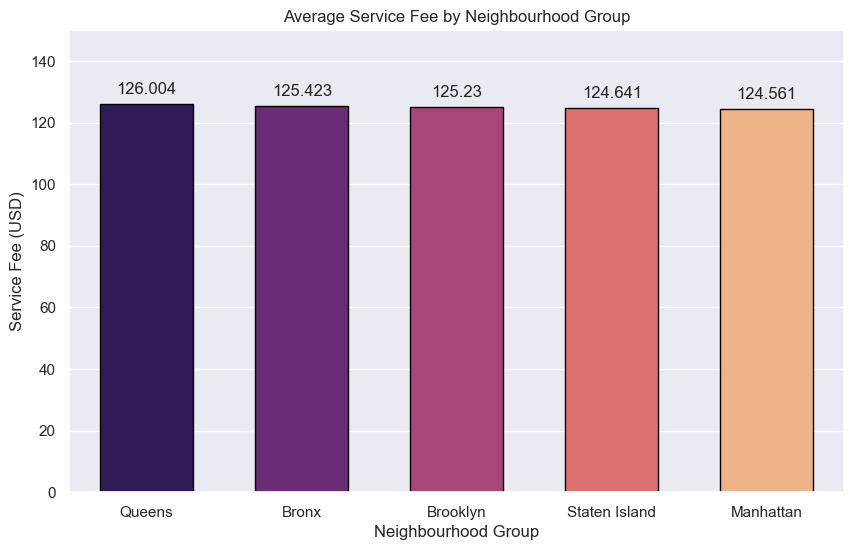

In [44]:
avg_service_fee_by_group = data.groupby('neighbourhood group')['service fee'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.set(style = 'darkgrid')

count = [140]

bar = sns.barplot(x=avg_service_fee_by_group.index,
            y=avg_service_fee_by_group.values,
            hue = avg_service_fee_by_group.index,
            legend = False,
            gap = 0.25,
            palette='magma',
            edgecolor = 'black',
            linewidth = 1)

for container in bar.containers:
    bar.bar_label(container, padding = 5)

plt.ylim(0, max(count) + 10)

plt.title("Average Service Fee by Neighbourhood Group")
plt.ylabel("Service Fee (USD)")
plt.xlabel("Neighbourhood Group")

plt.show()

## **3. Top Earning listings On Airbnb ->** ##

In [45]:
top_earning_listings = data[['name', 'host name', 'neighbourhood group', 'room type', 'price', 'availability 365', 'estimated_annual_revenue']].sort_values(by='estimated_annual_revenue', ascending=False).head(10)
top_earning_listings

,name,host name,neighbourhood group,room type,price,availability 365,estimated_annual_revenue
70866,Artsy Harlem Guest Space,Laura,Manhattan,Entire home/apt,1186.0,3677.0,4360922.0
8177,Luminous Modern Apt Share for Young Professionals,Ollie,Brooklyn,Private room,1191.0,420.0,500220.0
1987,Cute & Comfortable One Bedroom,Maria,Brooklyn,Entire home/apt,1193.0,418.0,498674.0
13966,Elegant Chic Brooklyn Duplex House. Private Deck,Antonella,Brooklyn,Entire home/apt,1185.0,419.0,496515.0
9085,Huge Room on Central Park,Tj,Manhattan,Private room,1170.0,421.0,492570.0
7678,Lower East Side Minimalist Studio,Warren & Jessica,Manhattan,Entire home/apt,1195.0,412.0,492340.0
8327,"NEW! SAFE, Bright in the Heights",Akiea,Manhattan,Entire home/apt,1168.0,421.0,491728.0
7072,Quaint Sunny Cobble Hill Brownstone,Jen,Brooklyn,Entire home/apt,1170.0,420.0,491400.0
9629,Room in the heart of Williamsburg!,Nathaniel,Brooklyn,Private room,1152.0,426.0,490752.0
1473,A nice quiet room in Manhattan,Jay,Manhattan,Private room,1160.0,423.0,490680.0


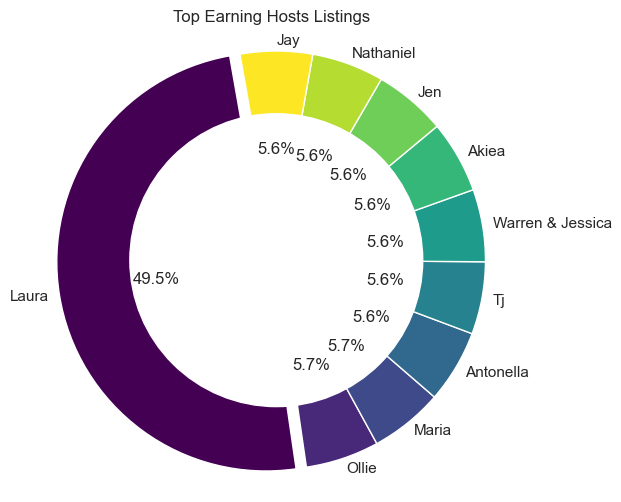

In [46]:
# Extracting labels (host names) and values (estimated annual revenue)

labels = top_earning_listings['host name']
values = top_earning_listings['estimated_annual_revenue']
color = ['#440154','#482878','#3e4a89','#31688e','#26828e','#1e9b8a','#35b779','#6ece58','#b5dc30','#fde725']
xplode = (0.05,0,0,0,0,0,0,0,0,0)

plt.figure(figsize=(6, 6))
sns.set(style = 'darkgrid')

plt.pie(values, 
        labels=labels,
        colors = color,
        explode = xplode,
        autopct='%1.1f%%',
        startangle = 100, 
        labeldistance = 1.05,
        pctdistance=0.53)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Top Earning Hosts Listings')
plt.show()

# **_↪ Review Analysis →_** #
## **_VISUALIZATION_ :** ##

## **1. Total Reviews By Neighbourhood Group ->** ##

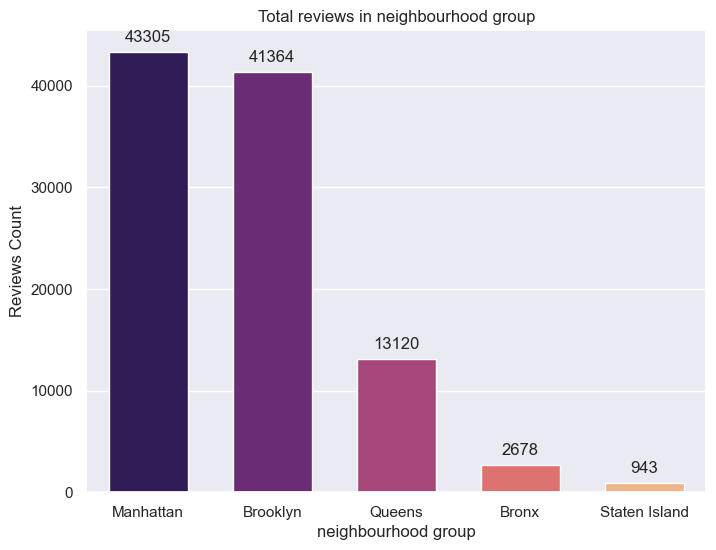

In [72]:
tr = data.groupby('neighbourhood group')['number of reviews'].count().sort_values(ascending = False)

plt.figure(figsize = (8,6))
sns.set(style = 'darkgrid')

# count = [4]
bar = sns.barplot(x = tr.index,
                  y = tr.values, 
                  hue = tr.index,
                  palette = 'magma',
                  gap = 0.2)

for container in bar.containers:
   bar.bar_label(container,padding = 5)

# plt.ylim(0,max(count))

plt.title('Total reviews in neighbourhood group')
plt.xlabel('neighbourhood group')
plt.ylabel('Reviews Count')

plt.show()

## **2. total Reviews By Room Type ->** ##

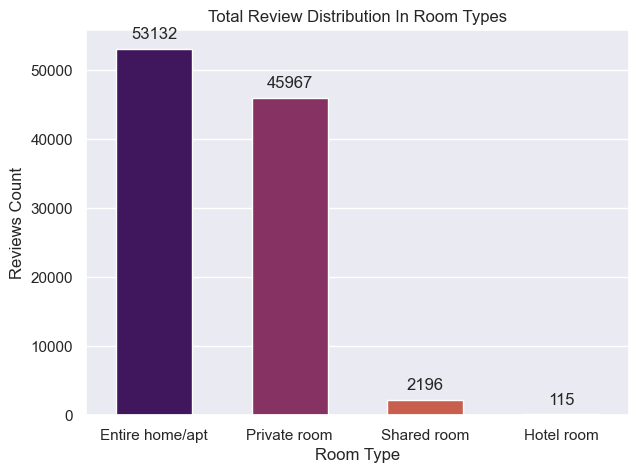

In [76]:
avg_rev_room = data.groupby('room type')['number of reviews'].count().sort_values(ascending = False).round(4)

plt.figure(figsize = (7,5))
sns.set(style = 'darkgrid')

bar = sns.barplot(x = avg_rev_room.index,
                  y = avg_rev_room.values, 
                  hue = avg_rev_room.index,
                  palette = 'inferno',
                  gap = 0.3)

for container in bar.containers:
   bar.bar_label(container,padding = 5)

plt.title('Total Review Distribution In Room Types')
plt.xlabel('Room Type')
plt.ylabel('Reviews Count')

plt.show()

## **3. Total Reviews Distribution By Host Identity Status ->** ##

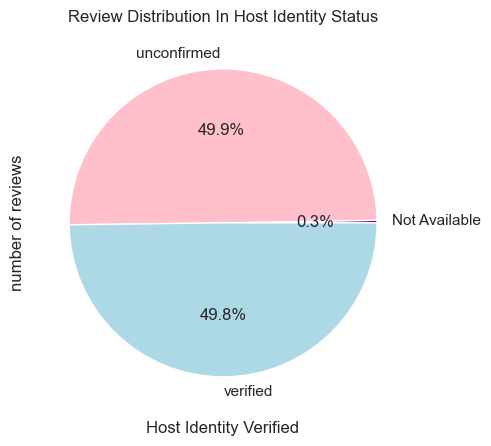

In [77]:
total_Review =  data.groupby('host_identity_verified')['number of reviews'].count()

plt.figure(figsize=(7, 5))
sns.set(style='darkgrid')

plt.pie(data = total_Review,
        x = total_Review.values, 
        labels =  total_Review.index,
        colors=['purple','pink','lightblue'],
        autopct='%1.1f%%')

plt.title('Review Distribution In Host Identity Status')
plt.ylabel('number of reviews')
plt.xlabel('Host Identity Verified')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# **_↪ Availability 365 Analysis →_** #
## **_VISUALIZATION_ :** ##

## **1. Finding Average availability per room type ->** ##


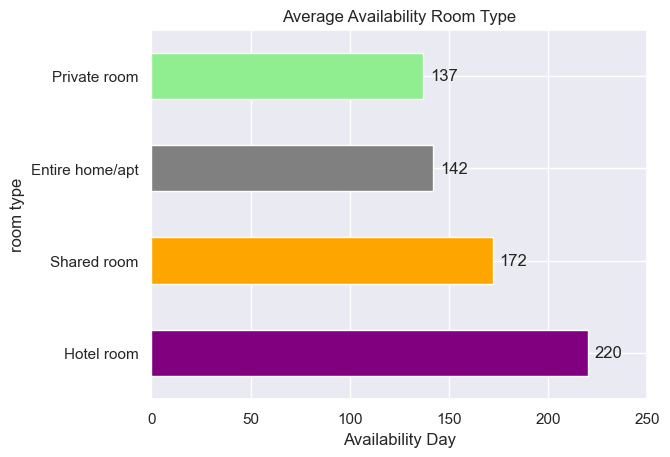

In [50]:
avg_avail_room_type = data.groupby('room type')['availability 365'].mean().sort_values(ascending=False).round(0)

bar = avg_avail_room_type.plot(kind = 'barh',
                               color = ['purple','orange','grey','lightgreen'])

for container in bar.containers:
    bar.bar_label(container, padding = 5)

plt.xlim(0,250)
plt.title('Average Availability Room Type')
plt.xlabel('Availability Day')

plt.show()

## **2. Finding Average availability per neighbourhood group ->** ##


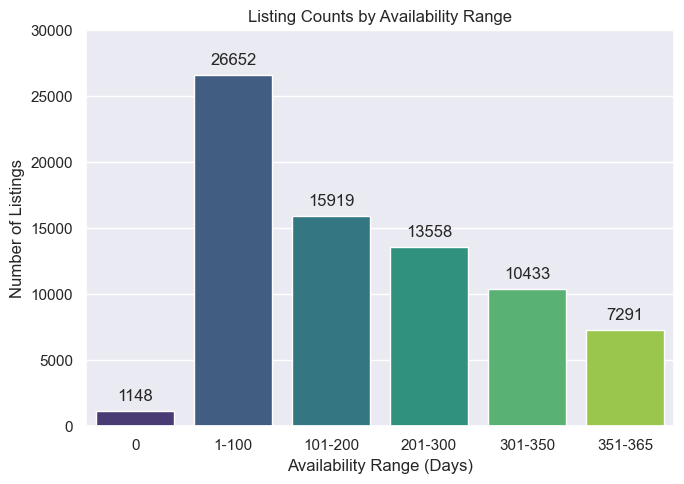

In [51]:
avg_avail_neighbourhood = data.groupby('neighbourhood group')['availability 365'].mean().sort_values(ascending=False).round(0)

plt.figure(figsize = (7,5))
sns.set(style = 'darkgrid')

bins = [0, 1, 100, 200, 300, 350, 365]
labels = ['0', '1-100', '101-200', '201-300', '301-350', '351-365']

data['availability_range'] = pd.cut(data['availability 365'], bins=bins, labels=labels, right=True)

bar = sns.countplot(data=data,
                    x='availability_range',
                    hue = 'availability_range',
                    legend = False,
                    palette="viridis")

for container in bar.containers:
   bar.bar_label(container,padding = 5)

plt.ylim(0,30000)

plt.title("Listing Counts by Availability Range")
plt.xlabel("Availability Range (Days)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

## **3. Listings with high availability (more than 350 days) ->** ##

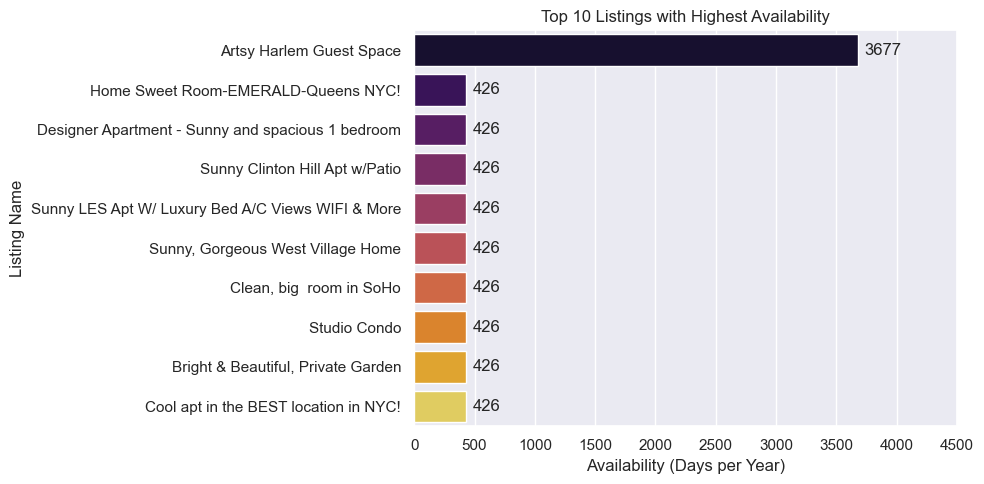

In [52]:
top_avail = data.sort_values(by='availability 365', ascending=False).head(10)

plt.figure(figsize = (10,5))
sns.set(style = 'darkgrid')

bar = sns.barplot(data=top_avail,
            x='availability 365',
            y='name', palette="inferno",
            hue = 'name',
            legend = False)

for container in bar.containers:
   bar.bar_label(container,padding = 5)

plt.xlim(0,4500)

plt.title("Top 10 Listings with Highest Availability")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Listing Name")
plt.tight_layout()

plt.show()

## **4. Count of zero-availability listings ->** ##


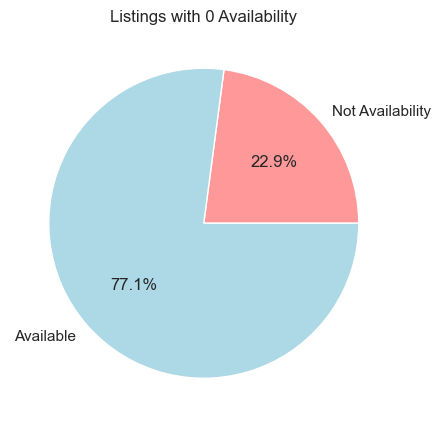

In [53]:
inactive_listings = data[data['availability 365'] == 0].shape[0]
total = data.shape[0]

plt.figure(figsize=(5, 6))
sns.set(style = 'darkgrid')

plt.pie([inactive_listings,
         total-inactive_listings],
        labels=["Not Availability", 
                "Available"],
        autopct='%1.1f%%',
        colors=["#ff9999", "lightblue"])

plt.title("Listings with 0 Availability")
plt.show()

In [54]:
data.to_excel('Airbnb_Data.xlsx', index=False)

In [55]:
data.isna().sum()

id                                    0
name                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         2
lat                                   0
long                                  0
country                               0
country code                          0
instant_bookable                      0
cancellation_policy                  70
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                           0
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
total price                           0
